In [1]:
# ==========================================
# House Price Prediction (No external installs)
# ==========================================
# Works with a local Kaggle dataset (e.g., "house_prices.csv")
# Just upload your file to the Jupyter environment first.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --------- 0) Settings ---------
CSV_FILE = "house_prices.csv"   # change this to your uploaded file

# --------- 1) Load Data ---------
df = pd.read_csv(CSV_FILE)
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())

# --------- 2) Basic Preprocessing ---------
# Example expected columns: 'SquareFeet', 'Bedrooms', 'Location', 'Price'
# Adjust these names according to your dataset
target_col = "Price"

# Identify numeric and categorical features
num_cols = []
cat_cols = []
for col in df.columns:
    if col == target_col:
        continue
    if pd.api.types.is_numeric_dtype(df[col]):
        num_cols.append(col)
    else:
        cat_cols.append(col)

print("\nNumeric Features:", num_cols)
print("Categorical Features:", cat_cols)

# Handle missing values
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce").fillna(df[col].median())
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# --------- 3) Train/Test Split ---------
X = df_encoded.drop(columns=[target_col]).values
y = df_encoded[target_col].values

rng = np.random.default_rng(42)
idx = np.arange(len(df_encoded))
rng.shuffle(idx)
split = int(0.8 * len(df_encoded))
train_idx, test_idx = idx[:split], idx[split:]

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

# --------- 4) Feature Standardization ---------
mean_ = X_train.mean(axis=0)
std_ = X_train.std(axis=0, ddof=0)
std_[std_ == 0] = 1.0

X_train_std = (X_train - mean_) / std_
X_test_std  = (X_test  - mean_) / std_

# --------- 5) Linear Regression (Normal Equation) ---------
# Add bias term
X_train_b = np.c_[np.ones((X_train_std.shape[0], 1)), X_train_std]
X_test_b = np.c_[np.ones((X_test_std.shape[0], 1)), X_test_std]

# Compute weights: w = (X^T X)^(-1) X^T y
w = np.linalg.pinv(X_train_b.T @ X_train_b) @ (X_train_b.T @ y_train)

# Predictions
y_pred = X_test_b @ w

# --------- 6) Evaluation Metrics ---------
mae = np.mean(np.abs(y_pred - y_test))
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print(f"\nMean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# --------- 7) Visualization ---------
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.tight_layout()
plt.show()


Matplotlib is building the font cache; this may take a moment.


Shape: (100, 6)
Columns: ['SquareFeet', 'Bedrooms', 'Bathrooms', 'Location', 'YearBuilt', 'Price']
   SquareFeet  Bedrooms  Bathrooms     Location  YearBuilt   Price
0        1660         5          3     Downtown       2004  410208
1        2094         2          1     Downtown       1989  419250
2        1930         2          3     Downtown       2001  390144
3        1895         1          2  Countryside       1965  307164
4        2438         4          1  Countryside       1962  432052

Numeric Features: ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt']
Categorical Features: ['Location']


<class 'TypeError'>: loop of ufunc does not support argument 0 of type float which has no callable sqrt method

Shape: (100, 6)
Columns: ['SquareFeet', 'Bedrooms', 'Bathrooms', 'Location', 'YearBuilt', 'Price']
   SquareFeet  Bedrooms  Bathrooms     Location  YearBuilt   Price
0        1660         5          3     Downtown       2004  410208
1        2094         2          1     Downtown       1989  419250
2        1930         2          3     Downtown       2001  390144
3        1895         1          2  Countryside       1965  307164
4        2438         4          1  Countryside       1962  432052
MAE: 7508.21
RMSE: 9131.84


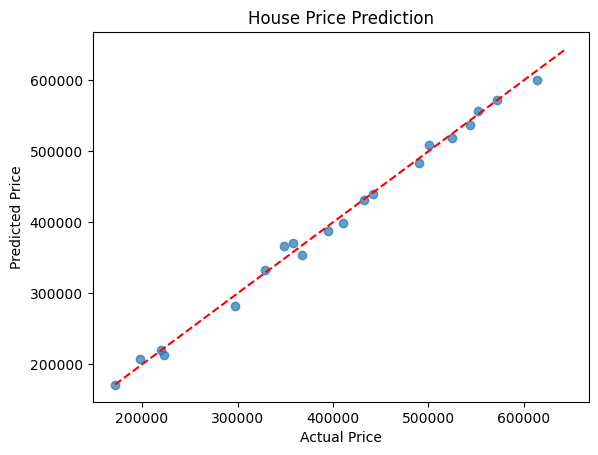

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv("house_prices.csv")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())

# 2. Separate features and target
X = df.drop(columns=["Price"])
y = df["Price"]

# 3. One-hot encode the categorical column
X = pd.get_dummies(X, columns=["Location"], drop_first=True)

# 4. Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Standardize numeric features
mean_ = X_train.mean(axis=0)
std_ = X_train.std(axis=0, ddof=0)
std_[std_ == 0] = 1.0  # avoid division by zero

X_train_std = (X_train - mean_) / std_
X_test_std = (X_test - mean_) / std_

# 6. Train a Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_std, y_train)

# 7. Predict
y_pred = model.predict(X_test_std)

# 8. Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# 9. Plot actual vs predicted prices
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("House Price Prediction")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # perfect prediction line
plt.show()
